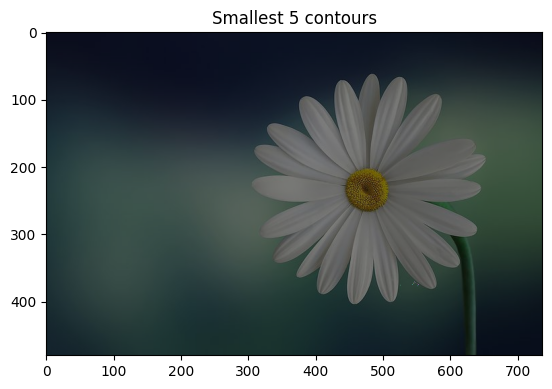

In [18]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
image = cv2.imread("img.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)
# contours, _ = cv2.findContours(thresh, key = cv2.contourArea, reverse = False)[:7]
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:7]
image_filled_contours = np.zeros_like(image)

for contour in contours:
    color = (np.random.randint(10, 255), np.random.randint(10, 255), np.random.randint(10, 255))

    cv2.drawContours(image_filled_contours, [contour], -1, color, thickness = cv2.FILLED)
    image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 0.2)
    
plt.imshow(image_with_filled_contours)
plt.title("Smallest 5 contours")
plt.show()

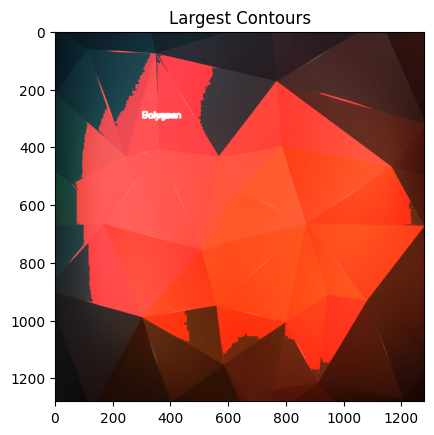

In [19]:
def get_shape(contour):
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(x)/h
        shape = "Square" if aspect_ratio ==1 else "Rectangle"
    elif len(approx) == 5:
        shape = "Pentagon"
    elif len(approx) == 6:
        shape = "Hexagon"
    elif len(approx) > 6:
        shape = "Polygon"
    else:
        shape = "Unknown"
    return (approx, shape)

image = cv2.imread("img9.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

_, thresh = cv2.threshold(gray, 120, 180, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_filled_contours = np.zeros_like(image)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:2]

for contour in contours:
    approx, shape = get_shape(contour)
    color = (255, 0, 0)
    cv2.drawContours(image_filled_contours, [contour], -2, color, thickness=cv2.FILLED)
    cx, cy = int(np.mean(approx[:, 0, 0])), int(np.mean(approx[:, 0, 1]))
    text_position = (cx - 150, cy-150)
    cv2.putText(image_filled_contours, shape, (300, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 5)

    image_with_filled_contours = cv2.addWeighted(image, 0.5, image_filled_contours, 0.8, 1)
plt.imshow(image_with_filled_contours)
plt.title("Largest Contours")
plt.grid(False)
plt.show()
    